# Обзор данных лотереи "Удача в придачу"

1. Источник данных - https://igra.evroopt.by/archive/winners/
2. Архив лотереи с регистрационными документами - https://igra.evroopt.by/archive/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv("evroopt_udacha.csv")
data.shape

(243126, 8)

In [12]:
data.head()

,tour,game_code,fio,place,sex,evroopt,prize,n_prize
0,27,3123897,Самкович Валентина Петровна,г. Минск,f,NaN,Квартира в Минске!,NaN
1,27,2735459,Ходос Ольга Владимировна,г. Витебск,f,NaN,Автомобиль Hyundai Creta,NaN
2,27,927866,Лисовская Леонарда Болеславовна,г. Лида,f,NaN,Автомобиль Hyundai Creta,NaN
3,27,1708769,Волков Валерий Владимирович,г. Бобруйск,m,NaN,Автомобиль Hyundai Creta,NaN
4,27,3099634,Васенко Александр Викторович,г. Могилев,m,NaN,Сертификат 100 BYN,1.0


## Предварительные замечания

0. Данные нужно доработать
1. Всего доступны данные по 243 126 победителям
2. Для каждого победителя в исходных данных указаны:
    - номер тура лотереи
    - код игры
    - ФИО (как правило, полное)
    - место покупки лотерейного билета
    - описание приза
    - номер приза
3. Кроме этого, в файл были определены и добавлены:
    - поле sex - пол победителя (пока не удалось определить пол для 1 970 победителей)
    - поле evroopt (является или не является сотрудником компании "Евроопт", которая проводит лотерею)

Первое, что бросается в глаза - это динамика количества разыгрываемых призов. С 24 тура количество призов и победителей резко выросло, а с 30 тура так же резко сократилось.

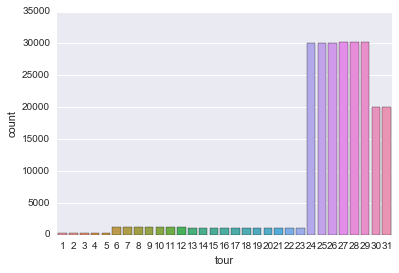

In [23]:
sns.countplot(data["tour"])

Смотрим, где чаще всего выигрывают

In [19]:
places = data["place"].value_counts(normalize = True)
places.head(10)

г. Минск         0.277214
г. Гомель        0.057275
г. Витебск       0.045820
г. Гродно        0.038556
г. Могилев       0.030906
г. Брест         0.029269
г. Бобруйск      0.023630
г. Лида          0.021746
г. Жлобин        0.016967
г. Новополоцк    0.016761
Name: place, dtype: float64

28% выигрышей происходит в Минске. Вероятность выиграть в Гомеле и других городах - не более 6%.
Смотрим, кто чаще выигрывает: мужчины или женщины

In [11]:
data["sex"].value_counts(normalize = True)

f    0.717809
m    0.282191
Name: sex, dtype: float64

Короче, чтобы выиграть, желательно быть женщиной и играть в Минске.